In [1]:
options(repr.plot.width=20, repr.plot.height=15)

In [2]:
require(data.table)
require(DESeq2)
require(EnhancedVolcano)

Loading required package: data.table

Loading required package: DESeq2

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsp

In [12]:
genes=fread("~/Documents/CE_methyl/cov_CV.log")

Warning message in fread("~/Documents/CE_methyl/cov_CV.log"):
“Detected 1 column names but the data has 40 columns (i.e. invalid file). Added 39 extra default column names at the end.”
Warning message in fread("~/Documents/CE_methyl/cov_CV.log"):
“Discarded single-line footer: <<= Wed Feb 9 02:43:57 EST 2022 job cov_CV done>>”


In [13]:
rownames(genes)=paste0("gene",1:NROW(genes))

In [14]:
meta=read.csv("~/Documents/CE_methyl/CE_methyl_meta.csv")

In [15]:
rownames(meta)=meta$UniqueID

In [16]:
genedata=as.data.frame(genes[,1:10])

In [17]:
rownames(genedata)=rownames(genes)

In [18]:
counts=genes[,11:NCOL(genes), drop = FALSE]

In [19]:
counts=as.data.frame(counts)

In [20]:
rownames(counts)=rownames(genedata)

In [21]:
colnames(counts)=c("BBB-WBO-B21", "BBB-WBV-B70", "BBO-BBO-B16", "BBO-BBY-B27", "BBO-WBO-B16", "BBO-WBV-B64", "BBR-BBB-B50", "BBR-BBG-B38",
"BBR-BBY-B26", "BBR-BBY-W25", "BBY-WBG-B42", "BPO-BPO-O16", "BPR-BPG-O38", "BPR-BPR-O02", "BPY-BPG-O42", "BPY-BPY-O29",
"WBB-WBV-W69", "WBG-BBB-W56", "WBG-WBG-W44", "WBO-BBR-W03", "WBO-WBV-W64", "WBV-WBO-W23", "WBV-WBR-W12", "WBY-BBV-W65",
"WBY-BBY-W30", "WPB-BPG-G45", "WPO-BPO-G16", "WPO-BPY-G28", "WPR-BPY-G25", "WPV-BPR-G11")

In [ ]:
#counts=t(counts)

In [22]:
meta$TC1=paste(meta$Treatment1_oxygen, meta$Treatment1_temp)

In [23]:
meta$TC2=paste(meta$Treatment2_oxygen, meta$Treatment2_temp)

In [24]:
head(meta)

,UniqueID,Treatment1_oxygen,Treatment1_temp,Tank1,Treatment2_oxygen,Treatment2_temp,Tank2,X,X.1,TC1,TC2
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<chr>,<chr>
BBB-WBO-B21,BBB-WBO-B21,Hypoxic,Ambient,B,Normoxic,Ambient,O,NA,NA,Hypoxic Ambient,Normoxic Ambient
BBB-WBV-B70,BBB-WBV-B70,Hypoxic,Ambient,B,Normoxic,Ambient,V,NA,NA,Hypoxic Ambient,Normoxic Ambient
BBO-BBO-B16,BBO-BBO-B16,Hypoxic,Ambient,O,Hypoxic,Ambient,O,NA,NA,Hypoxic Ambient,Hypoxic Ambient
BBO-BBY-B27,BBO-BBY-B27,Hypoxic,Ambient,O,Hypoxic,Ambient,Y,NA,NA,Hypoxic Ambient,Hypoxic Ambient
BBO-WBO-B16,BBO-WBO-B16,Hypoxic,Ambient,O,Normoxic,Ambient,O,NA,NA,Hypoxic Ambient,Normoxic Ambient
BBO-WBV-B64,BBO-WBV-B64,Hypoxic,Ambient,O,Normoxic,Ambient,V,NA,NA,Hypoxic Ambient,Normoxic Ambient


In [25]:
meta_hw=meta[meta$TC2=="Hypoxic Warm",]

In [ ]:
dim(meta_hw)

In [ ]:
colnames(counts) %in% meta_hw$UniqueID

In [ ]:
counts_hw=counts[,colnames(counts) %in% meta_hw$UniqueID , drop = FALSE]

In [ ]:
dim(counts)

In [ ]:
dim(counts_hw)

In [ ]:
dim(counts_hw)

In [ ]:
rownames(counts_hw)
rownames(meta_hw)

In [ ]:
dds_hw <- DESeqDataSetFromMatrix(countData = counts_hw,
                              colData = meta_hw,
                              design= ~ TC1)

In [ ]:
dds_hw=DESeq(dds_hw)

In [ ]:
resultsNames(dds_hw)

In [ ]:
res=results(dds_hw, name="TC1_Normoxic.Warm_vs_Hypoxic.Warm")


In [ ]:
rownames(res)

In [ ]:
sig1_stress = res[which(res$padj < 0.05), ]

In [ ]:
dim(sig1_stress)

In [31]:
sig1_stress=as.data.frame(sig1_stress)

In [32]:
sig_hw_genes=merge(sig1_stress, genedata, by="row.names")

In [33]:
sig_hw_genes

Row.names,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,+ Tue Feb 8 17:21:56 EST 2022 job cov_CV started in mThC.q with jobID=2933237 on compute-43-14,V2,V3,V4,V5,V6,V7,V8,V9,V10
<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
gene1000522,61.28301,-1.2202554,0.2835154,-4.304018,1.677283e-05,0.0163666539,NC_035785.1,14836819,14837359,.,.,+,Gnomon,CDS,2,"ID=cds-XP_022287989.1;Parent=rna-XM_022432281.1;Dbxref=GeneID:111100413,Genbank:XP_022287989.1;Name=XP_022287989.1;Note=The sequence of the model RefSeq protein was modified relative to this genomic sequence to represent the inferred CDS: inserted 1 base in 1 codon;exception=unclassified translation discrepancy;gbkey=CDS;gene=LOC111100413;product=LOW QUALITY PROTEIN: uncharacterized protein LOC111100413;protein_id=XP_022287989.1"
gene1000523,61.28301,-1.2202554,0.2835154,-4.304018,1.677283e-05,0.0163666539,NC_035785.1,14836819,14837359,.,.,+,Gnomon,exon,.,"ID=exon-XM_022432281.1-5;Parent=rna-XM_022432281.1;Dbxref=GeneID:111100413,Genbank:XM_022432281.1;Note=The sequence of the model RefSeq transcript was modified relative to this genomic sequence to represent the inferred CDS: inserted 1 base in 1 codon;exception=unclassified transcription discrepancy;gbkey=mRNA;gene=LOC111100413;product=uncharacterized LOC111100413;transcript_id=XM_022432281.1"
gene1002863,57.83640,-1.7313285,0.4123639,-4.198545,2.686351e-05,0.0219189158,NC_035785.1,16070902,16071073,.,.,-,Gnomon,CDS,1,"ID=cds-XP_022287931.1;Parent=rna-XM_022432223.1;Dbxref=GeneID:111100401,Genbank:XP_022287931.1;Name=XP_022287931.1;gbkey=CDS;gene=LOC111100401;product=inhibitor of Bruton tyrosine kinase-like;protein_id=XP_022287931.1"
gene1002864,57.83640,-1.7313285,0.4123639,-4.198545,2.686351e-05,0.0219189158,NC_035785.1,16070902,16071073,.,.,-,Gnomon,exon,.,"ID=exon-XM_022432223.1-23;Parent=rna-XM_022432223.1;Dbxref=GeneID:111100401,Genbank:XM_022432223.1;gbkey=mRNA;gene=LOC111100401;product=inhibitor of Bruton tyrosine kinase-like;transcript_id=XM_022432223.1"
gene1003369,204.55774,0.9824967,0.2540138,3.867887,1.097824e-04,0.0477598177,NC_035785.1,16471853,16472037,.,.,+,Gnomon,CDS,1,"ID=cds-XP_022289770.1;Parent=rna-XM_022434062.1;Dbxref=GeneID:111101541,Genbank:XP_022289770.1;Name=XP_022289770.1;gbkey=CDS;gene=LOC111101541;product=transient receptor potential cation channel subfamily A member 1 homolog isoform X1;protein_id=XP_022289770.1"
gene1003370,204.55774,0.9824967,0.2540138,3.867887,1.097824e-04,0.0477598177,NC_035785.1,16471853,16472037,.,.,+,Gnomon,CDS,1,"ID=cds-XP_022289771.1;Parent=rna-XM_022434063.1;Dbxref=GeneID:111101541,Genbank:XP_022289771.1;Name=XP_022289771.1;gbkey=CDS;gene=LOC111101541;product=transient receptor potential cation channel subfamily A member 1 homolog isoform X2;protein_id=XP_022289771.1"
gene1003371,204.55774,0.9824967,0.2540138,3.867887,1.097824e-04,0.0477598177,NC_035785.1,16471853,16472037,.,.,+,Gnomon,CDS,1,"ID=cds-XP_022289772.1;Parent=rna-XM_022434064.1;Dbxref=GeneID:111101541,Genbank:XP_022289772.1;Name=XP_022289772.1;gbkey=CDS;gene=LOC111101541;product=transient receptor potential cation channel subfamily A member 1 homolog isoform X3;protein_id=XP_022289772.1"
gene1003372,204.55774,0.9824967,0.2540138,3.867887,1.097824e-04,0.0477598177,NC_035785.1,16471853,16472037,.,.,+,Gnomon,exon,.,"ID=exon-XM_022434062.1-10;Parent=rna-XM_022434062.1;Dbxref=GeneID:111101541,Genbank:XM_022434062.1;gbkey=mRNA;gene=LOC111101541;product=transient receptor potential cation channel subfamily A member 1 homolog%2C transcript variant X1;transcript_id=XM_022434062.1"
gene1003373,204.55774,0.9824967,0.2540138,3.867887,1.097824e-04,0.0477598177,NC_035785.1,16471853,16472037,.,.,+,Gnomon,exon,.,"ID=exon-XM_022434063.1-10;Parent=rna-XM_022434063.1;Dbxref=GeneID:111101541,Genbank:XM_022434063.1;gbkey=mRNA;gene=LOC111101541;product=transient receptor potential cation channel subfamily A member 1 homolog%2C transcript variant X2;transcript_id=XM_022434

In [34]:
write.csv(sig_hw_genes,"~/Documents/CE_methyl/sig_hw_genes.csv")

In [332]:
row.names(sig1_stress)

[1] "gene926"     "gene927"     "gene928"     "gene17015"   "gene17018"  
   [6] "gene17705"   "gene17706"   "gene17707"   "gene17708"   "gene33415"  
  [11] "gene33416"   "gene33417"   "gene33418"   "gene35929"   "gene35930"  
  [16] "gene35931"   "gene39039"   "gene39040"   "gene39370"   "gene39371"  
  [21] "gene39372"   "gene40226"   "gene40227"   "gene40228"   "gene40734"  
  [26] "gene40849"   "gene40850"   "gene40851"   "gene45569"   "gene45570"  
  [31] "gene45571"   "gene45572"   "gene48823"   "gene48824"   "gene50213"  
  [36] "gene50216"   "gene56911"   "gene56912"   "gene74842"   "gene74843"  
  [41] "gene74844"   "gene74845"   "gene78526"   "gene78527"   "gene85349"  
  [46] "gene85350"   "gene87274"   "gene87275"   "gene87276"   "gene87277"  
  [51] "gene88957"   "gene107451"  "gene107452"  "gene117172"  "gene117173" 
  [56] "gene124396"  "gene124397"  "gene127738"  "gene127739"  "gene127740" 
  [61] "gene127741"  "gene127742"  "gene127743"  "gene127744"  "gene127745" 
  [66] "gene127746"  "gene127747"  "gene127748"  "gene127749"  "gene127750" 
  [71] "gene127751"  "gene127752"  "gene127753"  "gene127755"  "gene138542" 
  [76] "gene138543"  "gene160214"  "gene161027"  "gene161028"  "gene161029" 
  [81] "gene161030"  "gene162274"  "gene162275"  "gene183685"  "gene183686" 
  [86] "gene183687"  "gene187105"  "gene187106"  "gene187453"  "gene187454" 
  [91] "gene187455"  "gene189026"  "gene189027"  "gene193095"  "gene193096" 
  [96] "gene193097"  "gene193098"  "gene193099"  "gene193100"  "gene193101" 
 [101] "gene193102"  "gene193951"  "gene193952"  "gene193953"  "gene193954" 
 [106] "gene204141"  "gene204142"  "gene204143"  "gene204714"  "gene204715" 
 [111] "gene204716"  "gene210204"  "gene210205"  "gene210206"  "gene210207" 
 [116] "gene229796"  "gene229797"  "gene229798"  "gene229799"  "gene229800" 
 [121] "gene229801"  "gene229802"  "gene229803"  "gene229804"  "gene229805" 
 [126] "gene235279"  "gene235280"  "gene235281"  "gene235282"  "gene235283" 
 [131] "gene235284"  "gene235440"  "gene235441"  "gene236956"  "gene236957" 
 [136] "gene236958"  "gene236959"  "gene236960"  "gene236961"  "gene236962" 
 [141] "gene236971"  "gene236972"  "gene236973"  "gene236974"  "gene236975" 
 [146] "gene236976"  "gene236977"  "gene252018"  "gene252019"  "gene252020" 
 [151] "gene263021"  "gene263022"  "gene263023"  "gene263024"  "gene263025" 
 [156] "gene263026"  "gene263027"  "gene263028"  "gene263029"  "gene263030" 
 [161] "gene263031"  "gene263032"  "gene263033"  "gene263034"  "gene264144" 
 [166] "gene264145"  "gene264146"  "gene264147"  "gene264148"  "gene264149" 
 [171] "gene269601"  "gene269609"  "gene269610"  "gene275661"  "gene275662" 
 [176] "gene275663"  "gene298686"  "gene298687"  "gene302471"  "gene314611" 
 [181] "gene314612"  "gene315234"  "gene315235"  "gene320172"  "gene320173" 
 [186] "gene322788"  "gene322789"  "gene322807"  "gene322808"  "gene323421" 
 [191] "gene323422"  "gene324212"  "gene324213"  "gene329383"  "gene329384" 
 [196] "gene329385"  "gene329386"  "gene329387"  "gene329388"  "gene329389" 
 [201] "gene329390"  "gene329391"  "gene329447"  "gene365689"  "gene365802" 
 [206] "gene365803"  "gene365804"  "gene366583"  "gene366584"  "gene366585" 
 [211] "gene366586"  "gene366587"  "gene366588"  "gene370671"  "gene370672" 
 [216] "gene375748"  "gene375749"  "gene375750"  "gene375751"  "gene399640" 
 [221] "gene399641"  "gene399642"  "gene399643"  "gene399644"  "gene399645" 
 [226] "gene399646"  "gene399647"  "gene399648"  "gene399649"  "gene404292" 
 [231] "gene406539"  "gene406540"  "gene433341"  "gene433342"  "gene466396" 
 [236] "gene468996"  "gene468997"  "gene468998"  "gene478452"  "gene478453" 
 [241] "gene478454"  "gene478455"  "gene484210"  "gene484211"  "gene494057" 
 [246] "gene494058"  "gene494059"  "gene499061"  "gene507797"  "gene507798" 
 [251] "gene509194"  "gene509195"  "gene509196"  "gene509197"  "gene509198" 
 [256] "gene509199"  "gene535659"  "gene535660"  "gene560436"  "gene560437" 

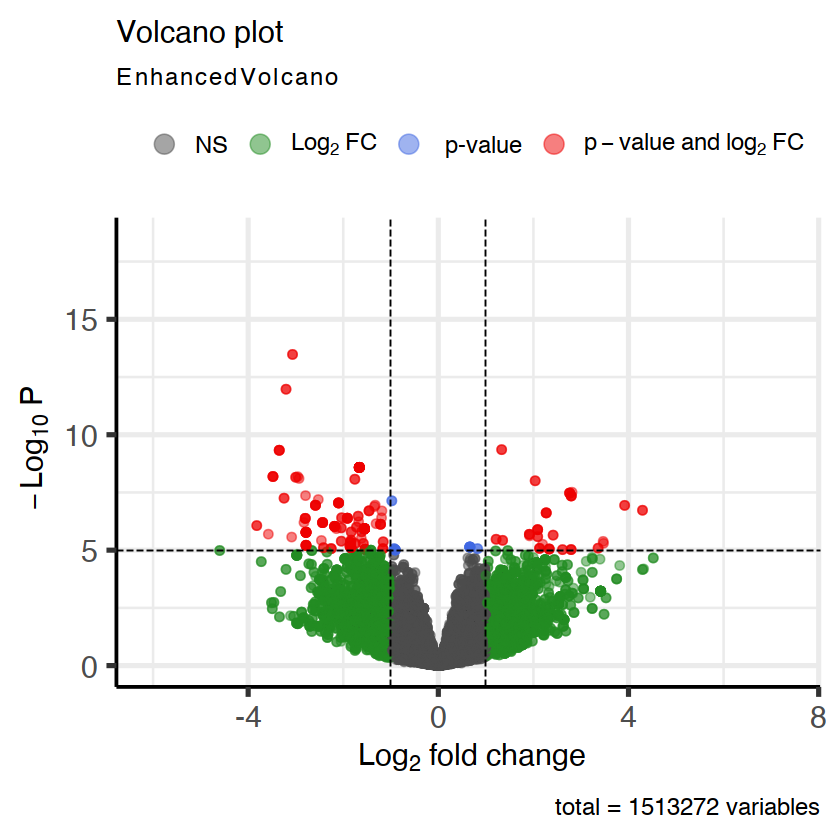

In [35]:
  EnhancedVolcano(res,
    lab=NA,
    x = 'log2FoldChange',
    y = 'pvalue')

In [110]:
#counts=t(counts)

In [18]:
head(counts)

,BBB-WBO-B21,BBB-WBV-B70,BBO-BBO-B16,BBO-BBY-B27,BBO-WBO-B16,BBO-WBV-B64,BBR-BBB-B50,BBR-BBG-B38,BBR-BBY-B26,BBR-BBY-W25,⋯,WBO-WBV-W64,WBV-WBO-W23,WBV-WBR-W12,WBY-BBV-W65,WBY-BBY-W30,WPB-BPG-G45,WPO-BPO-G16,WPO-BPY-G28,WPR-BPY-G25,WPV-BPR-G11
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
gene1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
gene2,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
gene3,15,22,43,34,39,44,86,24,44,76,⋯,84,15,12,106,49,314,27,33,24,56
gene4,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
gene5,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
gene6,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [26]:
dds <- DESeqDataSetFromMatrix(countData = counts,
                              colData = meta,
                              design= ~ TC1)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]



In [27]:
dds=DESeq(dds)

estimating size factors

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

final dispersion estimates

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This 

In [28]:
resultsNames(dds)

[1] "Intercept"                              
[2] "TC1_Hypoxic.Warm_vs_Hypoxic.Ambient"    
[3] "TC1_Normoxic.Ambient_vs_Hypoxic.Ambient"
[4] "TC1_Normoxic.Warm_vs_Hypoxic.Ambient"

In [29]:
res=results(dds, name="TC1_Hypoxic.Warm_vs_Hypoxic.Ambient")

In [202]:
sig1_t = res[which(res$padj < 0.05), ]

In [203]:
dim(sig1_t)

[1] 75  6

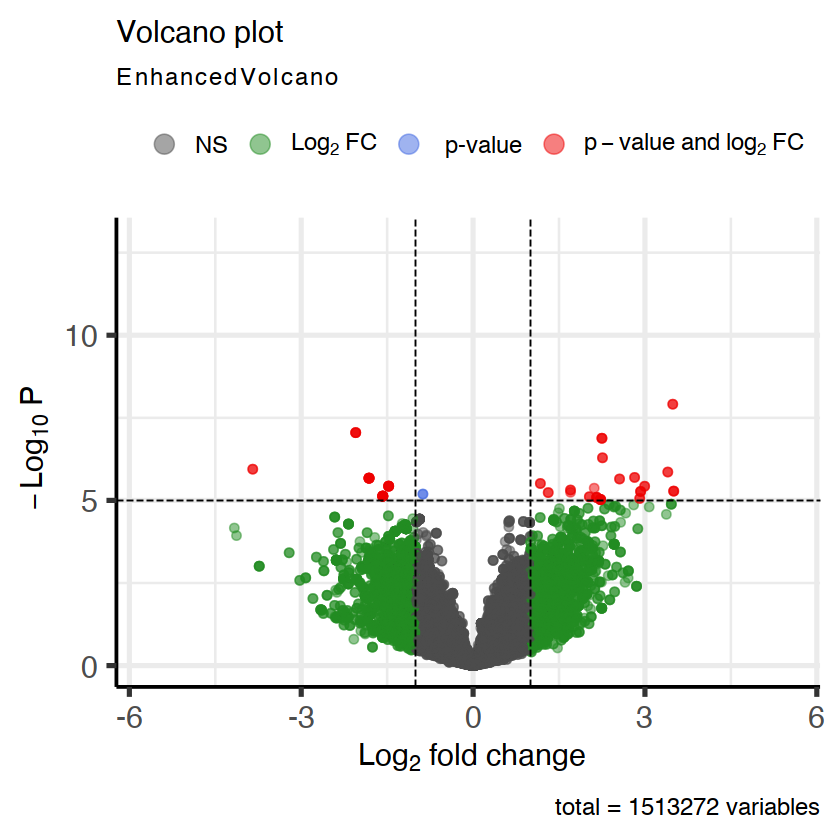

In [362]:
  EnhancedVolcano(res,
    lab=NA,
    x = 'log2FoldChange',
    y = 'pvalue')

In [51]:
res=results(dds, name="TC1_Normoxic.Ambient_vs_Hypoxic.Ambient")

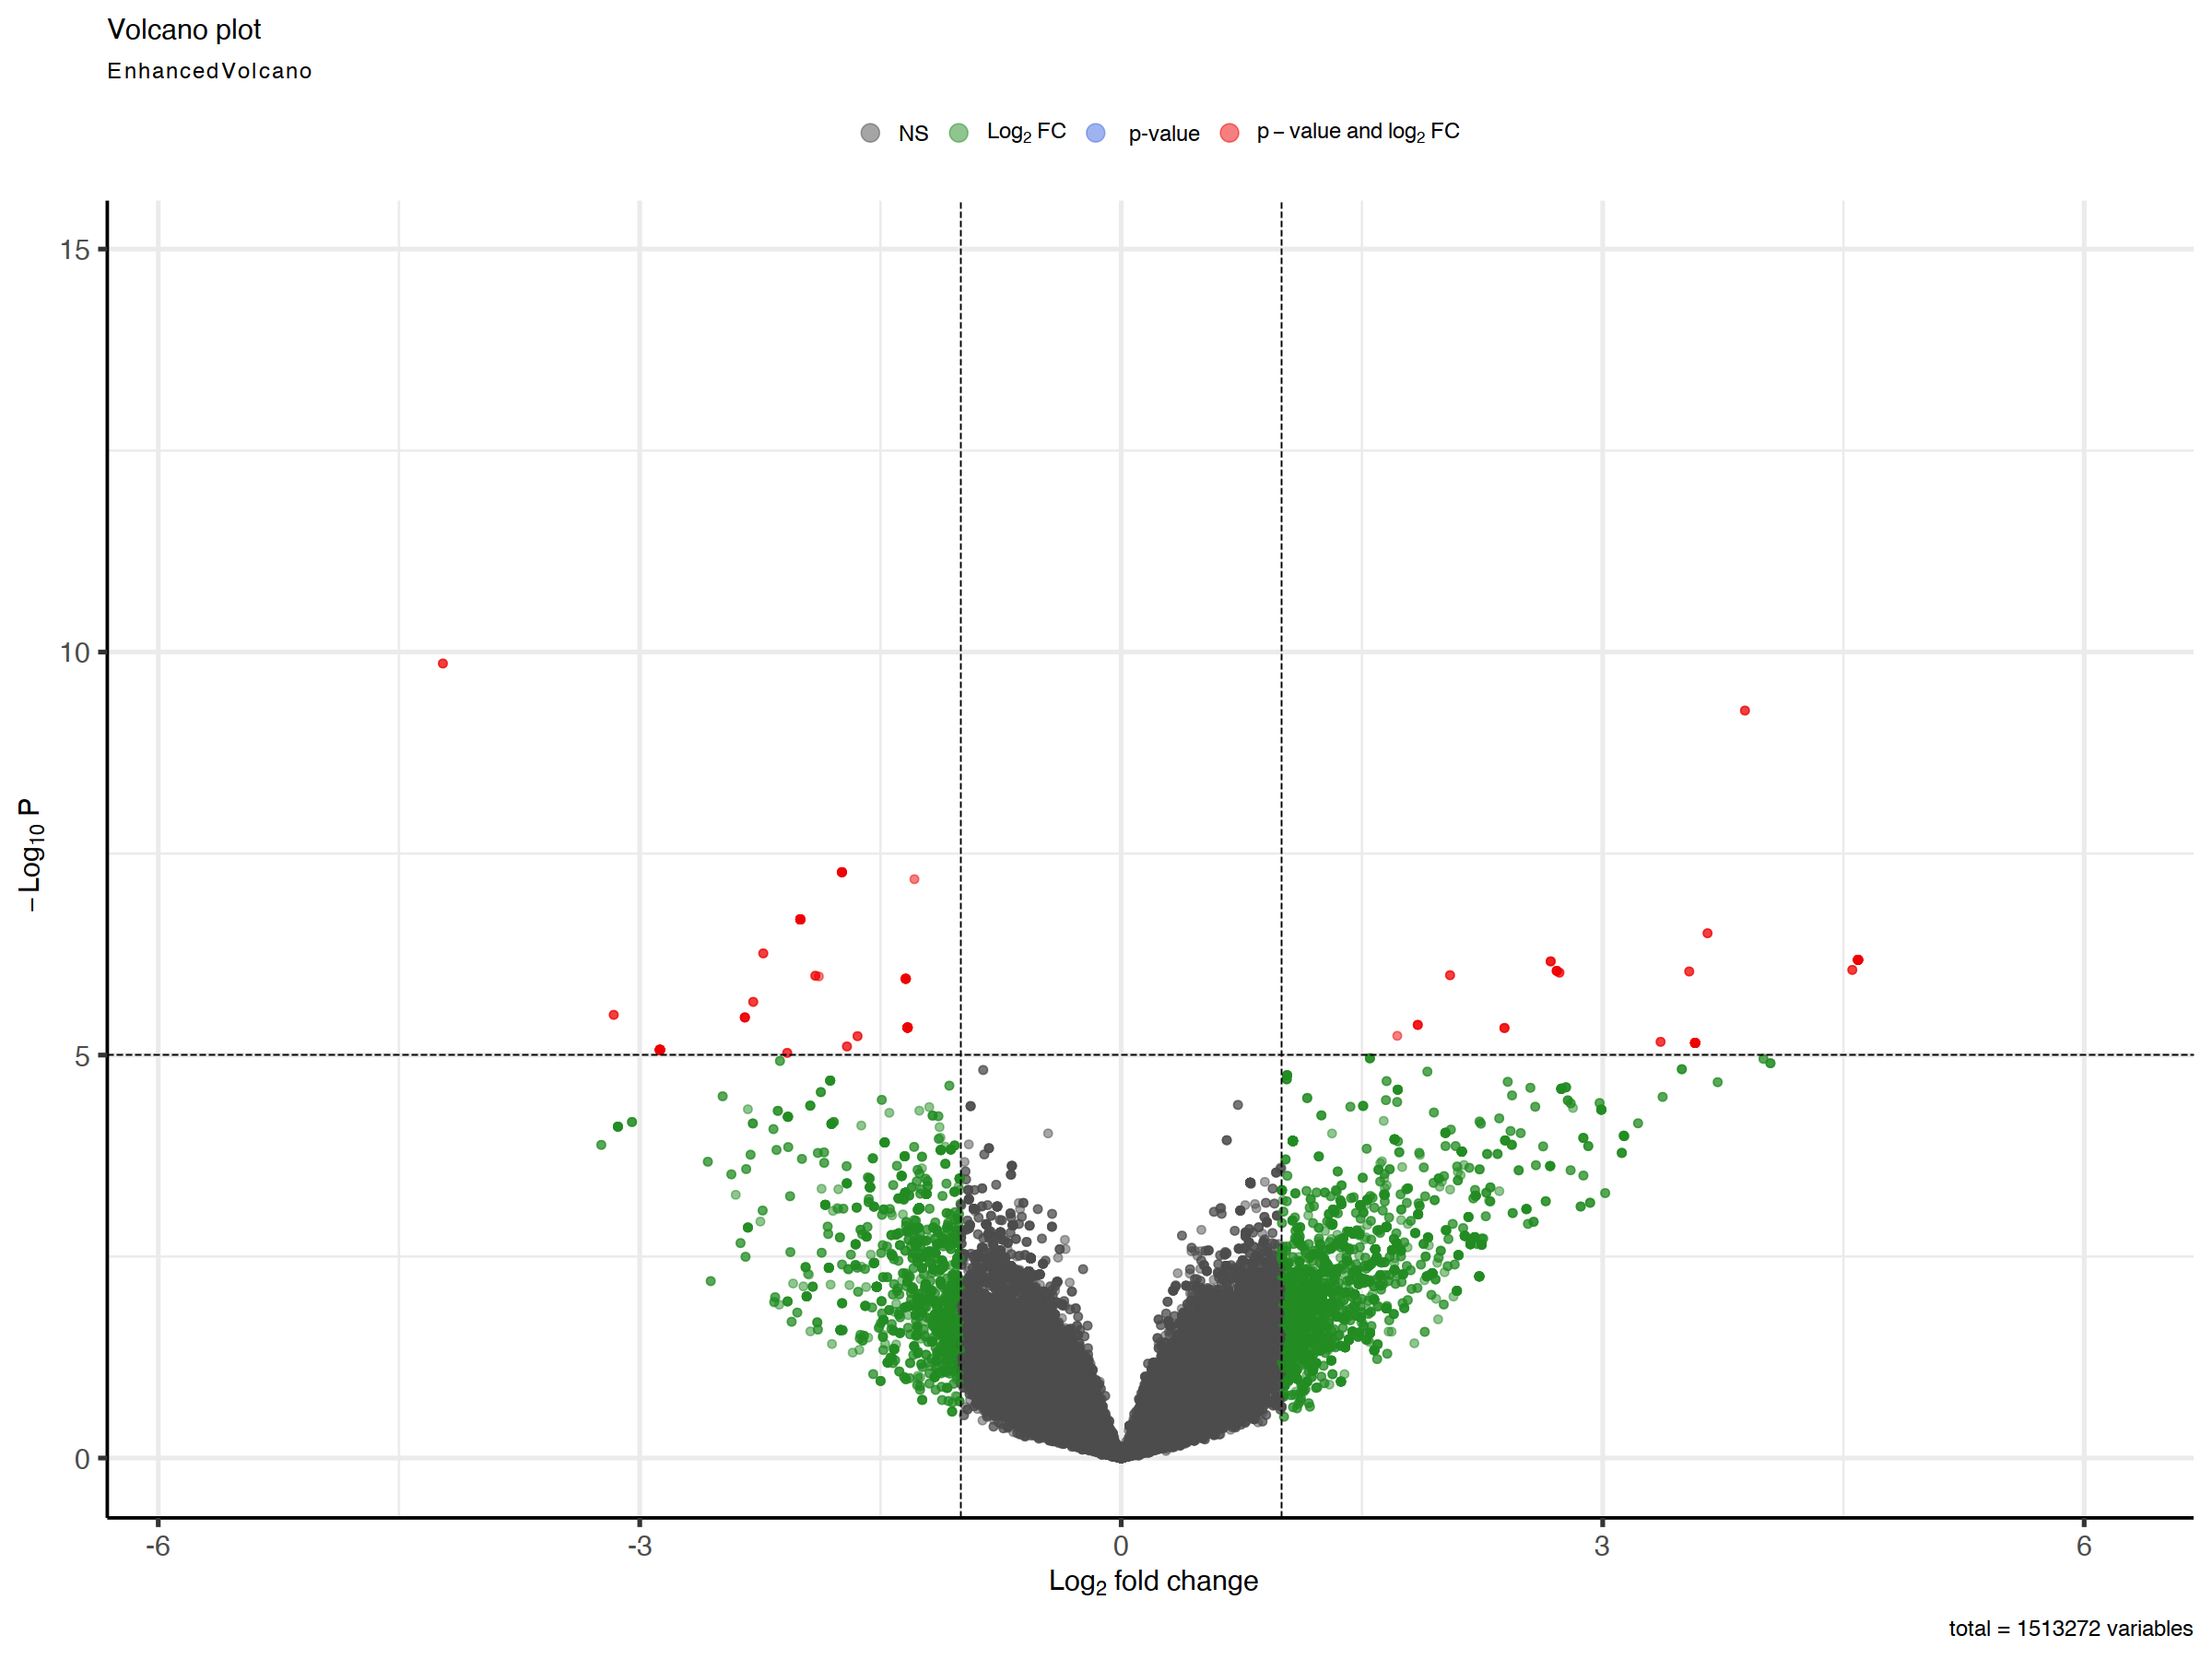

In [52]:
  EnhancedVolcano(res,
    lab=NA,
    x = 'log2FoldChange',
    y = 'pvalue')

In [53]:
sig1_ox = res[which(res$padj < 0.05), ]

In [54]:
dim(sig1_ox)

[1] 217   6

In [30]:
res=results(dds, name="TC1_Normoxic.Warm_vs_Hypoxic.Ambient")

In [31]:
head(res)

log2 fold change (MLE): TC1 Normoxic.Warm vs Hypoxic.Ambient 
Wald test p-value: TC1 Normoxic.Warm vs Hypoxic.Ambient 
DataFrame with 6 rows and 6 columns
       baseMean log2FoldChange     lfcSE      stat     pvalue      padj
      <numeric>      <numeric> <numeric> <numeric>  <numeric> <numeric>
gene1    0.0000             NA        NA        NA         NA        NA
gene2    0.0000             NA        NA        NA         NA        NA
gene3   70.8612        1.77908  0.618146   2.87809 0.00400096 0.0231697
gene4    0.0000             NA        NA        NA         NA        NA
gene5    0.0000             NA        NA        NA         NA        NA
gene6    0.0000             NA        NA        NA         NA        NA

In [32]:
  keyvals <- ifelse(
    res$log2FoldChange < 0& res$padj <0.05, "#000066",
      ifelse(res$log2FoldChange > 0& res$padj <0.05,"#FF6666" ,
        'grey'))

In [33]:
  keyvals <- ifelse(res$padj <0.05, "#000066",
        'grey')

In [35]:
  keyvals <- ifelse(
    res$log2FoldChange < -1& res$padj <0.05, "#000066",
      ifelse(res$log2FoldChange > 1& res$padj <0.05,"#FF6666" ,
        'grey'))
  keyvals[is.na(keyvals)] <- 'grey'
  names(keyvals)[keyvals == "#FF6666"] <- 'More methylation in Normoxic Warm'
  names(keyvals)[keyvals == 'grey'] <- 'Not significant'
  names(keyvals)[keyvals == "#000066"] <- 'More methylation in Hypoxic Ambient'

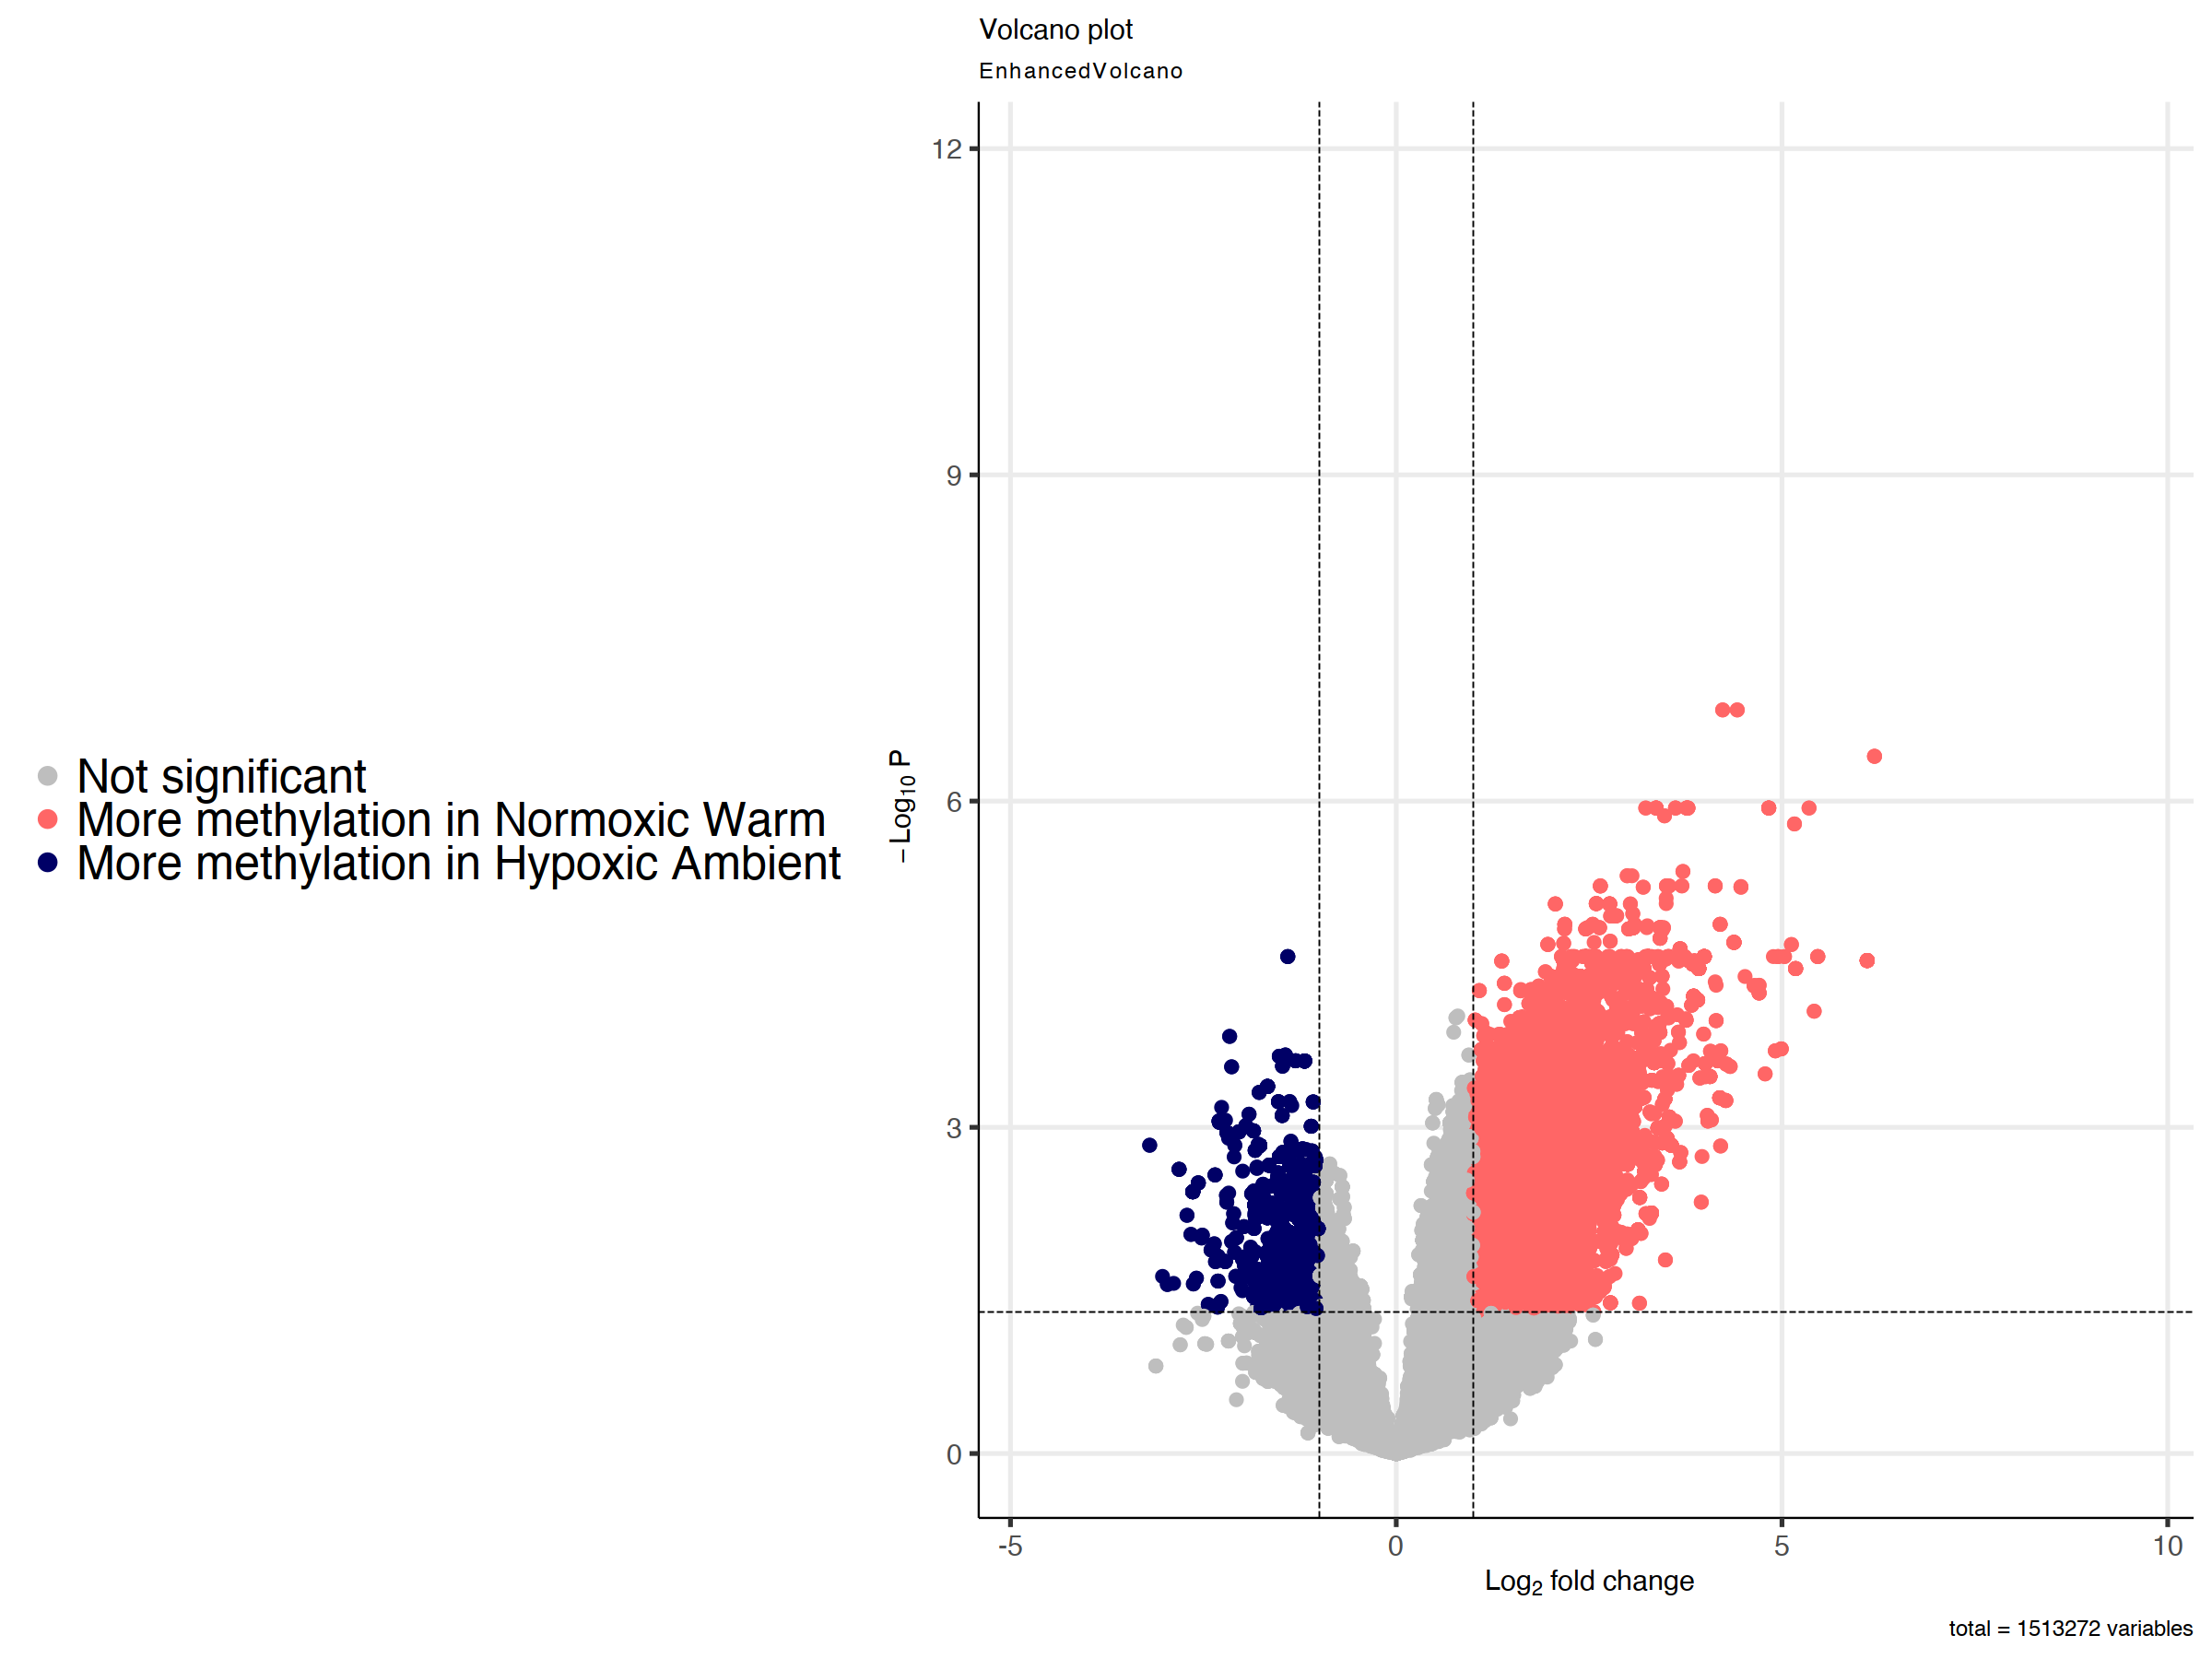

In [48]:
 EnhancedVolcano(res,
    lab = NA,
    x = 'log2FoldChange',
    y = 'padj',
    selectLab = rownames(res)[which(names(keyvals) %in% c('More methylation in Normoxic Warm', 'More methylation in Hypoxic Ambient'))],
    xlab = bquote(~Log[2]~ 'fold change'),
    pointSize = 3.5,
    pCutoff = 0.05,
    colCustom = keyvals,
    colAlpha = 1,
    legendPosition = 'left',
    legendLabSize = 30,
    legendIconSize = 5.0,
    drawConnectors = TRUE,
    widthConnectors = 1.0,
    colConnectors = 'black',
    arrowheads = FALSE,
    gridlines.major = TRUE,
    gridlines.minor = FALSE,
    border = 'partial',
    borderWidth = 0.5,
    borderColour = 'black')


In [40]:
scale_color_manual(values=c("#33CCFF"light blue,"#FF6666"pink, "#000066"dark blue, "#660000" ))+
scale_fill_manual(values=c("#33CCFF","#FF6666", "#000066", "#660000"

ERROR: Error in parse(text = x, srcfile = src): <text>:1:38: unexpected symbol
1: scale_color_manual(values=c("#33CCFF"light
                                         ^


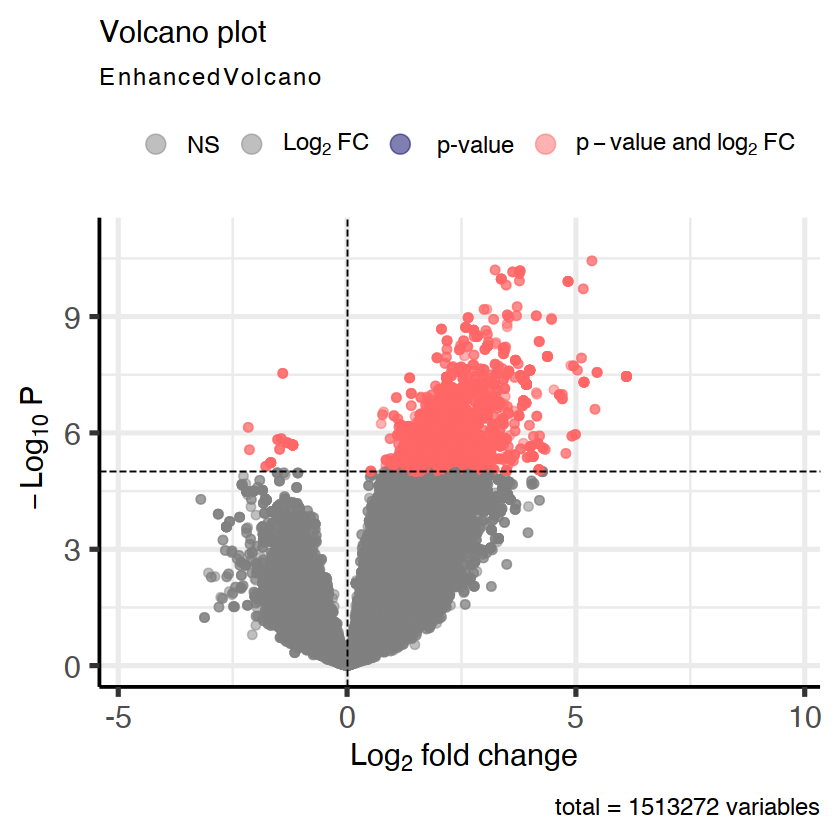

In [31]:
  EnhancedVolcano(res,
    lab=NA,
    x = 'log2FoldChange',
    y = 'pvalue', 
    FCcutoff= 0,
                  col=c("#808080", "#808080", "#000066","#FF6666"),
                 ylim = c(0, -log10(10e-12)))

In [208]:
sig1_int=sig1_t = res[which(res$padj < 0.05), ]

In [209]:
dim(sig1_int)

[1] 78140     6

In [69]:
dim(sig_t)

[1] 217   6

In [79]:
dim(sig_ox)

[1] 78140     6